# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
print(load_dotenv())


True


## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12_000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18697612,
            "id": 1,
            "last_updated": 1620000156,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1058298774294,
                    "percent_change_1h": 0.318939093953567,
                    "percent_change_24h": -2.07016926292348,
                    "percent_change_7d": 15.575480048866,
                    "percentage_change_1h": 0.318939093953567,
                    "percentage_change_24h": -2.07016926292348,
                    "percentage_change_7d": 15.575480048866,
                    "price": 56611.0,
                    "volume_24h": 38726120625
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18697612,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 115714552,
            "id": 1027,
            "last_updated": 1620000168,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 341739480845,
                    "percent_change_1h": 0.237098781020289,
                    "percent_change_24h": 0.260901905577107,
                    "percent_change_7d": 28.0157166195922,
                    "percentage_change_1h": 0.237098781020289,
                    "percentage_change_24h": 0.260901905577107,
                    "percentage_change_7d": 28.0157166195922,
                    "price": 2953.78,
                    "volume_24h": 35621008482
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 115714552,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of BTC is ${btc_price}')


The current price of BTC is $56611.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of ETH is ${eth_price}')


The current price of ETH is $2953.78


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'The current value of hoding BTC is ${btc_value}')


The current value of hoding BTC is $67933.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'The current value of holding ETH is ${eth_value: .2f}')


The current value of holding ETH is $ 15655.03


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The current cryptocurrency wallent balance is ${total_crypto_wallet: .2f}')


The current cryptocurrency wallent balance is $ 83588.23


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2021-04-30',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-30',tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AGG                                      SPY  \
                             open     high     low  close   volume    open   
time                                                                         
2021-04-30 00:00:00-04:00  114.41  114.515  114.33  114.5  5160765  417.63   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-30 00:00:00-04:00  418.54  416.34  417.3  73129109

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio['AGG']['close'])

# Print the AGG closing price
print(agg_close_price)


114.5


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio['SPY']['close'])

# Print the SPY closing price
print(spy_close_price)


417.3


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares*agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


22900.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares*spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


45903.0


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


68803.0

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'The total current wallet amount is: ${total_portfolio: .2f}')


The total current wallet amount is: $ 152391.23


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = ('total_crypto_wallet', 'total_stocks_bonds')

# Review the Python list savings_data
savings_data
    

('total_crypto_wallet', 'total_stocks_bonds')

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame({'Amount':[total_crypto_wallet, total_stocks_bonds]},
    index=savings_data
) 
# Display the savings_df DataFrame
savings_df

,Amount
total_crypto_wallet,83588.234
total_stocks_bonds,68803.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Pie chart of total portfolio'}, ylabel='Amount'>

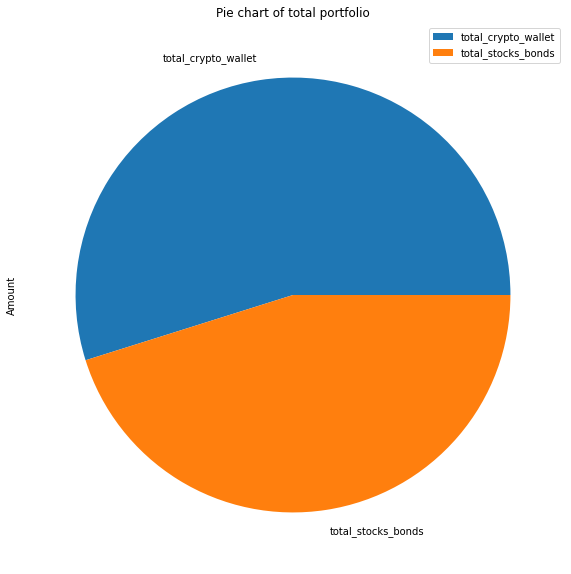

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', figsize=(20,10), title='Pie chart of total portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
        print('Congratulation, you have enough money for the emergency fund.')
elif total_portfolio == emergency_fund_value:
        print('Congratulation, you have reached your financial goal.')
else:
        print(f'Unfortunately, you still need $({total_portfolio}-{emergency_fund_value}) to reach the goal')



Congratulation, you have enough money for the emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 

start_date_1 = pd.Timestamp("2011-04-29", tz="America/New_York").isoformat()
end_date_1 = pd.Timestamp("2014-04-29", tz="America/New_York").isoformat()


In [29]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_SPYAGG_portfolio_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date_1,
    end= end_date_1,
    limit=1000
).df



# Display both the first and last five rows of the DataFrame
df_SPYAGG_portfolio_1


AGG                                        SPY  \
                             open      high      low   close  volume    open   
time                                                                           
2011-04-29 00:00:00-04:00  106.24  106.4900  106.240  106.46  435680  136.16   
2011-05-02 00:00:00-04:00  106.21  106.2400  106.040  106.19  553216  137.07   
2011-05-03 00:00:00-04:00  106.26  106.3400  106.150  106.23  471087  135.96   
2011-05-04 00:00:00-04:00  106.23  106.4400  106.220  106.44  559439  135.68   
2011-05-05 00:00:00-04:00  106.47  106.7162  106.470  106.68  758341  134.08   
...                           ...       ...      ...     ...     ...     ...   
2014-04-23 00:00:00-04:00  108.24  108.3600  108.210  108.27  679975  187.81   
2014-04-24 00:00:00-04:00  108.22  108.3700  108.180  108.35  440052  188.37   
2014-04-25 00:00:00-04:00  108.43  108.5499  108.375  108.39  441477  187.21   
2014-04-28 00:00:00-04:00  108.39  108.4600  108.260  108.34  467319  187.05   
2014-04-29 00:00:00-04:00  108.26  108.4000  108.240  108.35  799441  187.48   

                                                               
                             high      low   close     volume  
time                                                           
2011-04-29 00:00:00-04:00  136.57  135.980  136.46   84397226  
2011-05-02 00:00:00-04:00  137.18  135.950  136.23  112873467  
2011-05-03 00:00:00-04:00  136.19  135.045  135.72  120587313  
2011-05-04 00:00:00-04:00  135.73  134.230  134.84  159738689  
2011-05-05 00:00:00-04:00  134.95  133.020  133.64  184291407  
...                           ...      ...     ...        ...  
2014-04-23 00:00:00-04:00  187.92  187.300  187.46   59305611  
2014-04-24 00:00:00-04:00  188.39  186.930  187.82   75275648  
2014-04-25 00:00:00-04:00  187.33  185.870  186.31   83239780  
2014-04-28 00:00:00-04:00  187.69  184.960  186.90  113747549  
2014-04-29 00:00:00-04:00  188.04  187.080  187.73   68510961  

[754 rows x 10 columns]

In [30]:
start_date_2 = pd.Timestamp("2014-04-30", tz="America/New_York").isoformat()
end_date_2 = pd.Timestamp("2017-04-30", tz="America/New_York").isoformat()

In [31]:
df_SPYAGG_portfolio_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date_2,
    end= end_date_2,
    limit=1000
).df
df_SPYAGG_portfolio_2

AGG                                        SPY  \
                             open     high     low    close   volume    open   
time                                                                           
2014-04-30 00:00:00-04:00  108.46  108.610  108.38  108.590  1212989  187.44   
2014-05-01 00:00:00-04:00  108.38  108.700  108.38  108.560  1666105  188.22   
2014-05-02 00:00:00-04:00  108.45  108.780  108.35  108.710  1016713  188.31   
2014-05-05 00:00:00-04:00  108.72  108.740  108.56  108.610  1058779  187.14   
2014-05-06 00:00:00-04:00  108.69  108.730  108.62  108.710   724704  188.00   
...                           ...      ...     ...      ...      ...     ...   
2017-04-24 00:00:00-04:00  109.05  109.220  109.00  109.170  1945439  237.18   
2017-04-25 00:00:00-04:00  108.99  109.045  108.77  108.805  1717302  237.91   
2017-04-26 00:00:00-04:00  108.85  108.970  108.77  108.970  2679957  238.53   
2017-04-27 00:00:00-04:00  108.94  109.100  108.91  109.050  1249545  238.78   
2017-04-28 00:00:00-04:00  108.98  109.250  108.91  109.250  2722695  238.90   

                                                             
                             high     low   close    volume  
time                                                         
2014-04-30 00:00:00-04:00  188.50  187.18  188.39  82559876  
2014-05-01 00:00:00-04:00  188.84  187.73  188.32  76432683  
2014-05-02 00:00:00-04:00  189.14  187.78  188.07  74999692  
2014-05-05 00:00:00-04:00  188.55  186.62  188.44  59918693  
2014-05-06 00:00:00-04:00  188.13  186.74  186.82  62078358  
...                           ...     ...     ...       ...  
2017-04-24 00:00:00-04:00  237.41  236.61  237.12  72965789  
2017-04-25 00:00:00-04:00  238.95  237.81  238.53  55736881  
2017-04-26 00:00:00-04:00  239.53  238.35  238.44  57950185  
2017-04-27 00:00:00-04:00  238.95  237.98  238.61  39577860  
2017-04-28 00:00:00-04:00  238.93  237.93  238.10  42264701  

[756 rows x 10 columns]

In [32]:
start_date_3 = pd.Timestamp("2017-04-30", tz="America/New_York").isoformat()
end_date_3 = pd.Timestamp("2020-04-30", tz="America/New_York").isoformat()

In [33]:
df_SPYAGG_portfolio_3 = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date_3,
    end= end_date_3,
    limit=1000
).df
df_SPYAGG_portfolio_3

AGG                                        \
                             open      high      low    close    volume   
time                                                                      
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735   2335646   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890   2570794   
2017-05-03 00:00:00-04:00  108.97  108.9900  108.770  108.795   1765578   
2017-05-04 00:00:00-04:00  108.55  108.7000  108.550  108.665   1789624   
2017-05-05 00:00:00-04:00  108.72  108.7400  108.570  108.720   1287794   
...                           ...       ...      ...      ...       ...   
2020-04-24 00:00:00-04:00  117.22  117.3900  117.200  117.350   5991416   
2020-04-27 00:00:00-04:00  117.21  117.3600  116.820  116.840   6707494   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.120  117.250  10729690   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.200  117.430   9036494   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.065  117.150  13756340   

                              SPY                                        
                             open      high      low   close     volume  
time                                                                     
2017-05-01 00:00:00-04:00  238.69  239.1700  238.195  238.65   38750688  
2017-05-02 00:00:00-04:00  238.84  238.9800  238.300  238.79   39563850  
2017-05-03 00:00:00-04:00  238.32  238.8775  237.700  238.52   47292627  
2017-05-04 00:00:00-04:00  238.83  238.9225  237.780  238.75   46170233  
2017-05-05 00:00:00-04:00  239.18  239.7200  238.680  239.72   43733544  
...                           ...       ...      ...     ...        ...  
2020-04-24 00:00:00-04:00  280.73  283.7000  278.500  283.04  144001106  
2020-04-27 00:00:00-04:00  285.12  288.2700  284.620  287.11  135955115  
2020-04-28 00:00:00-04:00  291.02  291.4000  285.400  285.77  192772205  
2020-04-29 00:00:00-04:00  291.53  294.8800  290.410  293.19  204606690  
2020-04-30 00:00:00-04:00  291.71  293.3239  288.590  290.39  204197726  

[756 rows x 10 columns]

In [34]:
start_date_4 = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date_4 = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()

In [35]:
df_SPYAGG_portfolio_4 = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date_4,
    end= end_date_4,
    limit=1000
).df
df_SPYAGG_portfolio_4

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650   2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370   3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440   6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370   5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500   5160765   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  222309009  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66  140118601  
2020-05-05 00:00:00-04:00  286.64  289.2500  283.7134  286.22  144288798  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.8700  284.29  130709942  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70  137510572  
...                           ...       ...       ...     ...        ...  
2021-04-26 00:00:00-04:00  417.44  418.2200  416.8111  417.64   44689009  
2021-04-27 00:00:00-04:00  417.91  418.1400  416.3000  417.48   45962264  
2021-04-28 00:00:00-04:00  417.81  419.0100  416.9000  417.35   45533863  
2021-04-29 00:00:00-04:00  420.33  420.7200  416.4400  419.98   70595229  
2021-04-30 00:00:00-04:00  417.63  418.5400  416.3400  417.30   73129109  

[252 rows x 10 columns]

In [36]:
df_SPYAGG_portfolio = pd.concat([df_SPYAGG_portfolio_1, df_SPYAGG_portfolio_2, 
                                 df_SPYAGG_portfolio_3, df_SPYAGG_portfolio_4])
df_SPYAGG_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2011-04-29 00:00:00-04:00  106.24  106.4900  106.24  106.46   435680  136.16   
2011-05-02 00:00:00-04:00  106.21  106.2400  106.04  106.19   553216  137.07   
2011-05-03 00:00:00-04:00  106.26  106.3400  106.15  106.23   471087  135.96   
2011-05-04 00:00:00-04:00  106.23  106.4400  106.22  106.44   559439  135.68   
2011-05-05 00:00:00-04:00  106.47  106.7162  106.47  106.68   758341  134.08   
...                           ...       ...     ...     ...      ...     ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784  417.44   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667  417.91   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936  417.81   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983  420.33   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765  417.63   

                                                                
                             high       low   close     volume  
time                                                            
2011-04-29 00:00:00-04:00  136.57  135.9800  136.46   84397226  
2011-05-02 00:00:00-04:00  137.18  135.9500  136.23  112873467  
2011-05-03 00:00:00-04:00  136.19  135.0450  135.72  120587313  
2011-05-04 00:00:00-04:00  135.73  134.2300  134.84  159738689  
2011-05-05 00:00:00-04:00  134.95  133.0200  133.64  184291407  
...                           ...       ...     ...        ...  
2021-04-26 00:00:00-04:00  418.22  416.8111  417.64   44689009  
2021-04-27 00:00:00-04:00  418.14  416.3000  417.48   45962264  
2021-04-28 00:00:00-04:00  419.01  416.9000  417.35   45533863  
2021-04-29 00:00:00-04:00  420.72  416.4400  419.98   70595229  
2021-04-30 00:00:00-04:00  418.54  416.3400  417.30   73129109  

[2518 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [37]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = df_SPYAGG_portfolio,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()


AGG                                    \
                             open      high     low   close  volume   
time                                                                  
2011-04-29 00:00:00-04:00  106.24  106.4900  106.24  106.46  435680   
2011-05-02 00:00:00-04:00  106.21  106.2400  106.04  106.19  553216   
2011-05-03 00:00:00-04:00  106.26  106.3400  106.15  106.23  471087   
2011-05-04 00:00:00-04:00  106.23  106.4400  106.22  106.44  559439   
2011-05-05 00:00:00-04:00  106.47  106.7162  106.47  106.68  758341   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2011-04-29 00:00:00-04:00          NaN  136.16  136.57  135.980  136.46   
2011-05-02 00:00:00-04:00    -0.002536  137.07  137.18  135.950  136.23   
2011-05-03 00:00:00-04:00     0.000377  135.96  136.19  135.045  135.72   
2011-05-04 00:00:00-04:00     0.001977  135.68  135.73  134.230  134.84   
2011-05-05 00:00:00-04:00     0.002255  134.08  134.95  133.020  133.64   

                                                   
                              volume daily_return  
time                                               
2011-04-29 00:00:00-04:00   84397226          NaN  
2011-05-02 00:00:00-04:00  112873467    -0.001685  
2011-05-03 00:00:00-04:00  120587313    -0.003744  
2011-05-04 00:00:00-04:00  159738689    -0.006484  
2011-05-05 00:00:00-04:00  184291407    -0.008899

In [38]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995278,1.001202,1.005231,1.001491,1.003464,0.994439,1.005771,1.001463,0.993924,0.983776,...,0.996240,1.002434,0.993652,1.008043,0.997428,1.002297,0.991504,1.001522,1.013263,0.996030
2,0.997001,0.984329,1.016460,0.996976,0.995659,0.996797,1.015492,1.009105,0.984953,0.978309,...,0.993824,1.006552,0.991424,0.991339,1.004424,1.003401,0.996744,1.007693,0.997222,1.000605
3,0.998244,0.984793,1.001242,1.001533,0.996803,0.989276,1.019180,1.006057,0.981407,0.970318,...,0.989952,1.005329,0.992092,0.992603,1.015606,0.998732,1.000082,1.015320,1.006020,1.005536
4,1.002829,0.986488,0.985487,0.992466,0.997886,0.997549,1.028215,1.007526,0.980650,0.972378,...,0.993840,1.010171,0.986883,0.996344,1.022477,1.003132,0.997894,1.009952,0.998075,1.010788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.414975,5.978672,16.082680,4.729097,8.843905,5.332309,13.753120,16.681830,6.040098,4.244450,...,18.558512,10.953639,9.589926,6.837544,9.379409,10.000419,26.963663,9.981679,9.163777,5.814373
7557,5.379617,5.919291,16.140298,4.834251,8.801051,5.323479,13.717664,16.739426,6.096424,4.273216,...,18.838475,11.054156,9.564378,6.899106,9.459183,10.055444,27.058719,9.944311,9.165661,5.882938
7558,5.404997,5.915268,16.301550,4.867948,8.860461,5.339760,13.849770,16.877103,6.118052,4.279432,...,18.649530,11.149601,9.507649,6.870913,9.393629,10.100479,26.807760,9.998820,9.129657,5.862655
7559,5.422090,5.917886,16.325224,4.824699,8.872917,5.377318,13.836515,16.701179,6.130690,4.305194,...,18.822532,11.255544,9.440877,6.874268,9.312515,10.229228,26.597544,9.995975,9.121766,5.865242


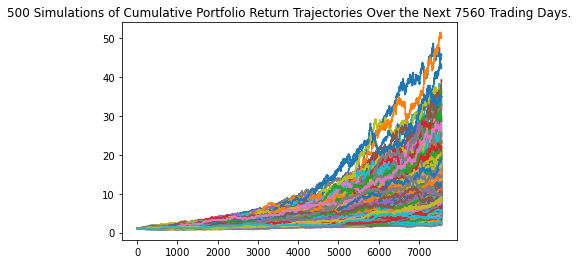

In [39]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_thirty_plot = MC_thirty_year.plot_simulation()
MC_sim_thirty_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

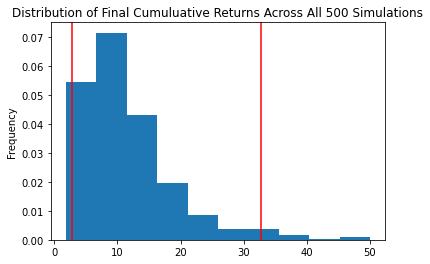

In [40]:
#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_thirty_dis_plot = MC_thirty_year.plot_distribution()
MC_sim_thirty_dis_plot.get_figure().savefig("MC_thirty_year_sim_dis_plot.png", bbox_inches="tight")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [41]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             11.606222
std               7.311312
min               1.827507
25%               6.499060
50%              10.023749
75%              14.425635
max              50.028051
95% CI Lower      2.849587
95% CI Upper     32.788151
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_portfolio)

152391.234


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_portfolio
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_portfolio

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that an initial investment in the portfolio over the next 30 years will end within in the range of $ 434252.07 and $ 4996626.75.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [44]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data = df_SPYAGG_portfolio,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()


AGG                                    \
                             open      high     low   close  volume   
time                                                                  
2011-04-29 00:00:00-04:00  106.24  106.4900  106.24  106.46  435680   
2011-05-02 00:00:00-04:00  106.21  106.2400  106.04  106.19  553216   
2011-05-03 00:00:00-04:00  106.26  106.3400  106.15  106.23  471087   
2011-05-04 00:00:00-04:00  106.23  106.4400  106.22  106.44  559439   
2011-05-05 00:00:00-04:00  106.47  106.7162  106.47  106.68  758341   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2011-04-29 00:00:00-04:00          NaN  136.16  136.57  135.980  136.46   
2011-05-02 00:00:00-04:00    -0.002536  137.07  137.18  135.950  136.23   
2011-05-03 00:00:00-04:00     0.000377  135.96  136.19  135.045  135.72   
2011-05-04 00:00:00-04:00     0.001977  135.68  135.73  134.230  134.84   
2011-05-05 00:00:00-04:00     0.002255  134.08  134.95  133.020  133.64   

                                                   
                              volume daily_return  
time                                               
2011-04-29 00:00:00-04:00   84397226          NaN  
2011-05-02 00:00:00-04:00  112873467    -0.001685  
2011-05-03 00:00:00-04:00  120587313    -0.003744  
2011-05-04 00:00:00-04:00  159738689    -0.006484  
2011-05-05 00:00:00-04:00  184291407    -0.008899

In [45]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997853,0.987258,1.000054,0.996842,0.994188,0.993268,1.000152,0.998398,1.015056,0.994589,...,1.000033,1.000295,0.986543,0.998572,1.009785,0.984790,1.001044,0.997633,1.011934,0.989631
2,0.976231,0.993224,0.998109,1.003184,0.982196,0.984574,1.004725,1.008451,1.015777,0.979680,...,1.012435,1.012739,0.992013,0.997764,1.018998,1.002692,0.983157,0.993752,1.004516,0.986705
3,0.980418,0.992445,0.997161,0.980005,0.984492,0.975924,1.013690,1.011454,1.008713,0.977629,...,1.009050,1.016369,0.987111,0.994859,1.010204,1.002155,0.995818,0.999842,1.007227,0.984589
4,0.978360,1.001575,1.009598,1.003440,0.996816,0.971638,1.020463,1.006064,1.023134,0.975366,...,1.015933,1.010022,0.978857,1.020534,1.008189,1.010228,1.008656,0.987941,1.001422,0.986739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.683477,1.751183,1.948454,1.940404,1.400007,3.090446,2.764901,1.995642,2.627306,2.254401,...,1.930829,2.164602,1.750137,4.801915,3.335187,1.492086,2.443040,3.244752,3.291001,1.805712
2517,3.672445,1.754893,1.931062,1.928336,1.412650,3.089885,2.814703,2.004072,2.641019,2.263702,...,1.915890,2.155178,1.747254,4.797572,3.385238,1.496325,2.430552,3.272883,3.298308,1.825100
2518,3.623514,1.758058,1.939753,1.939851,1.436392,3.078093,2.837691,2.003607,2.631612,2.249883,...,1.892951,2.155229,1.728771,4.785010,3.372883,1.485867,2.441882,3.332060,3.305417,1.830306
2519,3.610470,1.760219,1.955454,1.952254,1.455931,3.061021,2.840990,2.019095,2.586986,2.257753,...,1.921739,2.151843,1.730381,4.890691,3.389764,1.505407,2.441944,3.372020,3.332298,1.830127


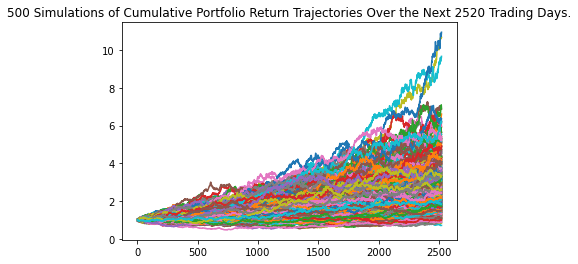

In [46]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_ten_year_line = MC_ten_year.plot_simulation()
MC_sim_ten_year_line.get_figure().savefig("MC_tenyear_sim_plot_line.png", bbox_inches="tight")

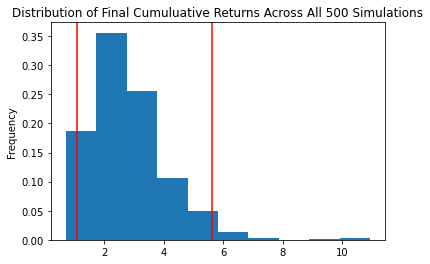

In [47]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_ten_year = MC_ten_year.plot_distribution()
MC_sim_ten_year.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

In [48]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_ten_statistics = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_ten_statistics)

count           500.000000
mean              2.801387
std               1.305933
min               0.713316
25%               1.882110
50%               2.566626
75%               3.379222
max              10.939148
95% CI Lower      1.078927
95% CI Upper      5.641425
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [49]:
# Print the current balance of the stock and bond portion of the members portfolio
total_portfolio


152391.234

In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_ten_statistics[8] * total_portfolio
ci_upper_ten_cumulative_return = MC_summary_ten_statistics[9] * total_portfolio

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that an initial investment in the portfolio over the next 30 years will end within in the range of $ 164418.99 and $ 859703.79.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?